In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

24510


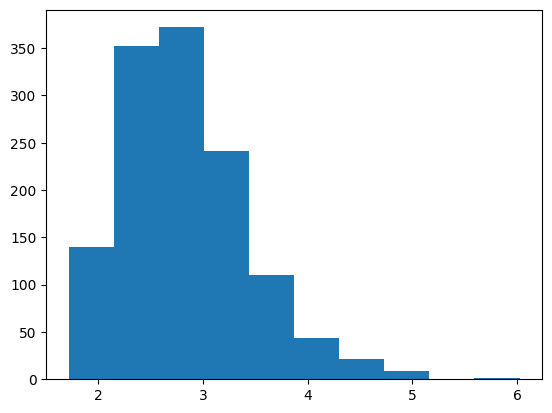

In [65]:
# Wildfire Data Import
wildfires_unfiltered_wfigs = pd.read_csv('./data/WFIGS_Incident_Locations_Colorado.csv', low_memory=False) 
# Source: https://data-nifc.opendata.arcgis.com/datasets/nifc::wildland-fire-incident-locations/explore?location=38.793308%2C-104.951929%2C8.34


wildfires_unfiltered_imsr = pd.read_csv('./data/IMSR_Incident_Locations_Colorado.csv', low_memory=False)
wildfires_unfiltered_imsr.head()
plt.hist(np.log10(wildfires_unfiltered_imsr['Incident Size (Acres)']), bins=10)
print(wildfires_unfiltered_imsr.size)
# Source : https://data-nifc.opendata.arcgis.com/datasets/nifc::imsr-incident-locations-view-final-occurrence/explore?location=38.662040%2C-102.136976%2C7.01&showTable=true

272


Text(0.5, 0, 'Log Initial Area | Log(Acres)')

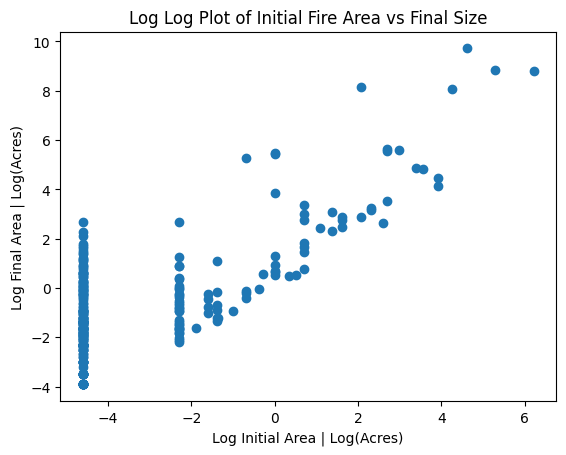

In [53]:

# For now I only care about a couple of variables: Latitude, Longitude, DiscoveryAcres, IncidentSize/FinaLAcres, InitialLat, InitialLong, InitialResponseDatetimew
wildfires = wildfires_unfiltered[['FinalAcres', 'InitialLatitude', 'InitialLongitude', 'InitialResponseDateTime', 'InitialResponseAcres']].dropna().reset_index()
#wildfires = wildfires.drop(wildfires[wildfires['DiscoveryAcres'] > 100].index)
#wildfires = wildfires.drop(wildfires[wildfires['FinalAcres'] > 10000].index)

wildfires = wildfires.drop(wildfires[wildfires['InitialResponseAcres'] >= wildfires['FinalAcres']].index)

print(len(wildfires))

wildfires['LogFinalAcres'] = np.log(wildfires['FinalAcres'])
#wildfires['LogDiscoveryAcres'] = np.log(wildfires['DiscoveryAcres'])
wildfires['LogInitialResponseAcres'] = np.log(wildfires['InitialResponseAcres'])
wildfires.head()






plt.scatter(wildfires['LogInitialResponseAcres'], wildfires['LogFinalAcres'])
plt.title("Log Log Plot of Initial Fire Area vs Final Size")
plt.ylabel('Log Final Area | Log(Acres)')
plt.xlabel('Log Initial Area | Log(Acres)')

## Getting Weather data in conjuction with fire data